In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [186]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [187]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [189]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Data Pre-Processing

In [190]:
df["y"].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [191]:
y = {"no": 0, "yes": 1}
df["y"] = df["y"].map(y)

In [192]:
df["default"].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

Ordinal Encoding

In [193]:
education_order = {
    "illiterate": 0,
    "basic.4y": 1,
    "basic.6y": 2,
    "basic.9y": 3,
    "high.school": 4,
    "professional.course": 5,
    "university.degree": 6,
    "unknown": 3
}
df["education"] = df["education"].map(education_order)

One-Hot Encoding

In [194]:
df = pd.get_dummies(df, columns=["job", "marital", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"], drop_first=True)

In [195]:
df.head()

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,261,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
1,57,4,149,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
2,37,4,226,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
4,56,4,307,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   education             41188 non-null  int64  
 2   duration              41188 non-null  int64  
 3   campaign              41188 non-null  int64  
 4   pdays                 41188 non-null  int64  
 5   previous              41188 non-null  int64  
 6   emp.var.rate          41188 non-null  float64
 7   cons.price.idx        41188 non-null  float64
 8   cons.conf.idx         41188 non-null  float64
 9   euribor3m             41188 non-null  float64
 10  nr.employed           41188 non-null  float64
 11  y                     41188 non-null  int64  
 12  job_blue-collar       41188 non-null  bool   
 13  job_entrepreneur      41188 non-null  bool   
 14  job_housemaid         41188 non-null  bool   
 15  job_management     

In [197]:
X_df = df.drop(['y'], axis=1).values
y_df = df['y'].values.reshape(-1,1)

In [198]:
print(X_df.shape)
print(y_df.shape)

(41188, 47)
(41188, 1)


Generating train and test datasets

In [199]:
np.random.seed(40)
indices = np.arange(X_df.shape[0])
np.random.shuffle(indices)
X_df = X_df[indices]
y_df = y_df[indices]

In [200]:
split = int(0.8 * X_df.shape[0])

In [201]:
X_train, X_test = X_df[:split], X_df[split:]
y_train, y_test = y_df[:split], y_df[split:]

In [202]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

X_train shape: (32950, 47) y_train shape: (32950, 1)
X_test shape: (8238, 47) y_test shape: (8238, 1)


In [203]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

Handle Outliers

In [204]:
def clip_outliers(X, lower=1, upper=99):
    low = np.percentile(X, lower, axis=0)
    high = np.percentile(X, upper, axis=0)
    return np.clip(X, low, high)

In [205]:
X_train = clip_outliers(X_train)

In [206]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (32950, 47) y_train shape: (32950, 1)


Normalization

In [207]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1.0
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [208]:
X_train, X_mu, X_sigma = zscore_normalize_features(X_train)

In [209]:
X_test = (X_test - X_mu) / X_sigma

Implementing PCA for Visualization

In [210]:
def pca(X, n_components=1):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_idx]
    components = eigenvectors[:, :n_components]
    X_reduced = np.dot(X_centered, components)
    return X_reduced, components

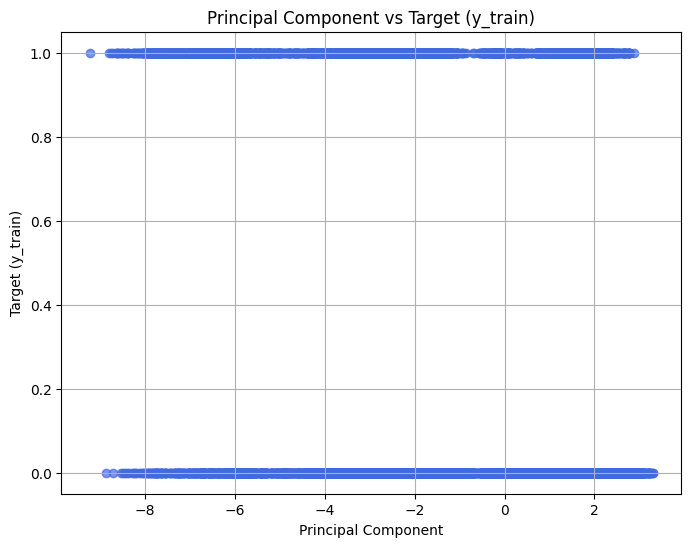

In [211]:
X_pca, _ = pca(X_train, n_components=1)
X_pca = X_pca.flatten()
y_train_flat = y_train.flatten()

plt.figure(figsize=(8,6))
plt.scatter(X_pca, y_train_flat, color='royalblue', alpha=0.7)
plt.title("Principal Component vs Target (y_train)")
plt.xlabel("Principal Component")
plt.ylabel("Target (y_train)")
plt.grid(True)
plt.show()

In [212]:
def sigmoid(z):
    g = 1/(1+np.exp(-z)) 
    return g

In [213]:
def compute_cost(X, y, w, b, w_pos, w_neg):
    m = X.shape[0]
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    cost = (-1 / m) * np.sum(w_pos * y * np.log(f_wb) + w_neg * (1 - y) * np.log(1 - f_wb))
    return cost

In [214]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
cost = compute_cost(X_train, y_train, initial_w, initial_b, 1, 1)
print(f'Cost at initial w and b (zeros): {cost}')

Cost at initial w and b (zeros): 0.6920527009954526


In [215]:
def compute_cost_reg(X, y, w, b, lambda_,  w_pos, w_neg):
    m,n = X.shape
    cost_without_reg = compute_cost(X, y, w, b, w_pos, w_neg)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w ** 2)
    total_cost = cost_without_reg + reg_cost
    return total_cost

In [216]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
lambda_ = 1
cost = compute_cost_reg(X_train, y_train, initial_w, initial_b, lambda_, 1, 1)
print("Regularized cost :", cost)

Regularized cost : 0.6895587281851545


In [217]:
def compute_gradient(X, y, w, b, w_pos, w_neg):
    m, n = X.shape
    f_wb = sigmoid(np.dot(X, w) + b)
    weights = np.where(y == 1, w_pos, w_neg)
    err = (f_wb - y) * weights
    dj_dw = (1/m) * np.dot(X.T, err)
    dj_db = (1/m) * np.sum(err)
    return dj_db, dj_dw

In [218]:
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b, 1, 1)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw[:4].tolist()}' )

dj_db at initial w and b (zeros):0.3857291852805673
dj_dw at initial w and b (zeros):[[-0.007810253634651516], [-0.009361793892546601], [-0.1320719856023957], [0.020327543122296107]]


In [219]:
def compute_gradient_reg(X, y, w, b, lambda_,  w_pos, w_neg): 
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b,  w_pos, w_neg)
    dj_dw += (lambda_ / m) * w
    return dj_db, dj_dw

In [220]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
lambda_ = 1
dj_db, dj_dw = compute_gradient_reg(X_train, y_train, initial_w, initial_b, lambda_, 1, 1)
print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

dj_db: 0.38791816132390666
First few elements of regularized dj_dw:
 [[0.0012384250064679443], [-0.017447052976010693], [-0.1383207242337586], [0.025604073306015992]]


In [221]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_,  w_pos, w_neg): 
    m = len(X)
    J_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_,  w_pos, w_neg)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
        if i<100000:
            cost =  cost_function(X, y, w_in, b_in, lambda_,  w_pos, w_neg)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1])}   ")
    return w_in, b_in, J_history

In [222]:
def predict(X, w, b): 
    m, n = X.shape
    p = np.zeros(m) 
    z = np.dot(X, w) + b
    f_wb = sigmoid(z)
    p = (f_wb >= 0.5).astype(int)
    return p

Adding weights to handle class imbalance

In [223]:
w_pos = len(y_train) / (2 * np.sum(y_train == 1))
w_neg = len(y_train) / (2 * np.sum(y_train == 0))

In [224]:
m, n = X_train.shape
initial_w = np.random.randn(n, 1) * 0.01 
initial_b = np.random.randn() * 0.01    
iterations = 1000
alpha = 0.08
lambda_ = 0.1
w,b, J_history = gradient_descent(X_train ,y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_, w_pos, w_neg)
print(f"b,w found by gradient descent: {b}, {w}")

Iteration    0: Cost 0.6541690081591507   


Iteration  100: Cost 0.36825332079138784   
Iteration  200: Cost 0.34058272934572625   
Iteration  300: Cost 0.33153761297496426   
Iteration  400: Cost 0.32772093721077233   
Iteration  500: Cost 0.3258711089868796   
Iteration  600: Cost 0.32488740672347427   
Iteration  700: Cost 0.3243247650201757   
Iteration  800: Cost 0.32398109822853455   
Iteration  900: Cost 0.32375701084586567   
Iteration  999: Cost 0.3236020421102561   
b,w found by gradient descent: -1.513637284934715, [[-5.00760841e-03]
 [ 7.59343999e-02]
 [ 1.62799076e+00]
 [-7.64088470e-02]
 [-1.99096750e-01]
 [-4.45246460e-02]
 [-5.26215541e-01]
 [ 1.05798006e-01]
 [ 7.99386985e-02]
 [-3.31045107e-01]
 [-5.22475334e-01]
 [-1.37746374e-01]
 [-3.84873204e-02]
 [-1.27790952e-02]
 [-2.59032372e-02]
 [ 9.11388843e-02]
 [-3.93268050e-02]
 [-7.10998870e-02]
 [ 5.73964297e-02]
 [-3.10083787e-02]
 [ 2.28384111e-02]
 [ 2.24813610e-03]
 [-1.30683887e-02]
 [ 2.19517851e-02]
 [ 1.27088342e-03]
 [-1.61808458e-01]
 [-1.06750910e-02]

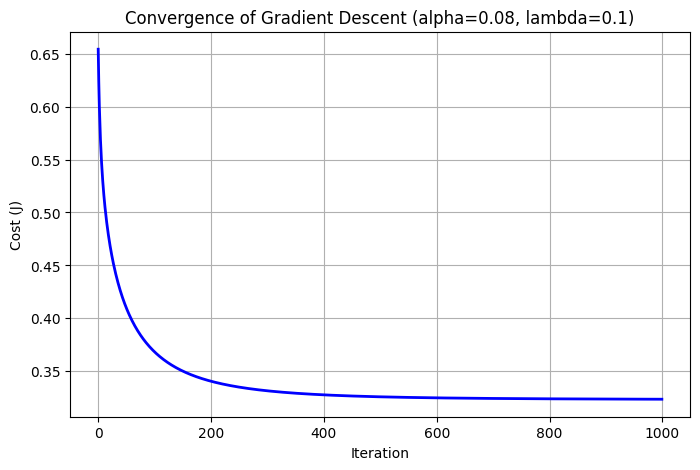

In [225]:
plt.figure(figsize=(8,5))
plt.plot(range(len(J_history)), J_history, color='b', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title(f"Convergence of Gradient Descent (alpha={alpha}, lambda={lambda_})")
plt.grid(True)
plt.show()

In [226]:
def f1_score_manual(y_true, y_pred):
    classes = np.unique(y_true)
    f1s = []
    for cls in classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))
        precision = tp / (tp + fp + 1e-10)
        recall = tp / (tp + fn + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)
        f1s.append(f1)
    return np.mean(f1s)

In [227]:
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

In [228]:
f1 = f1_score_manual(y_train, y_pred_train)
print("F1-Score Train:", f1)
f1 = f1_score_manual(y_test, y_pred_test)
print("F1-Score Test:", f1)

F1-Score Train: 0.7511096505975288
F1-Score Test: 0.7516409728852295


In [229]:
print('Train Accuracy: %f'%(np.mean(y_pred_train == y_train) * 100))
print('Test Accuracy: %f'%(np.mean(y_pred_test == y_test) * 100))

Train Accuracy: 85.899848
Test Accuracy: 86.222384


In [230]:
# Before adding weights
# F1-Score Train: 0.7400407840423967
# F1-Score Test: 0.7384422507623678

# Train Accuracy: 91.150228
# Test Accuracy: 91.114348

# After adding weights
# F1-Score Train: 0.7511096505975288
# F1-Score Test: 0.7516409728852295

# Train Accuracy: 85.899848
# Test Accuracy: 86.222384